**What is a Time Series?**

Time Series is generally data which is collected over time and is dependent on it. A series of data points collected in time order (at constant time intervals) is known as a time series. 
These are analyzed to determine the long term trend so as to forecast the future or perform some other form of analysis.
Most of business work on time series data is to analyze sales number for the next year, website traffic, count of traffic, number of calls received, etc.

**Time series analysis** comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.

**Time series forecasting** is the use of a model to predict future values based on previously observed values.

**Components of a Time Series**-:

1) **Level**: The baseline value for the series if it were a straight line.

2) **Trend**: The optional and often linear increasing or decreasing behavior of the series over time.

3) **Seasonality**: The optional repeating patterns or cycles of behavior over time.

4) **Noise**: The optional variability in the observations that cannot be explained by the model.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
dataset=pd.read_csv("international-airline-passengers.csv")

In [61]:
dataset.head()

,Month,Monthly Total (in 1000)
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [62]:
dataset.tail()

,Month,Monthly Total (in 1000)
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Monthly Total (in 1000)  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [64]:
dataset.describe()

,Monthly Total (in 1000)
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [65]:
dataset['Month']=pd.to_datetime(dataset['Month'],infer_datetime_format=True)

In [66]:
dataset['Month'].dtype

dtype('<M8[ns]')

In [67]:
indexed_data=dataset.set_index(['Month'])
indexed_data.head()

,Monthly Total (in 1000)
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'Number of passengers')

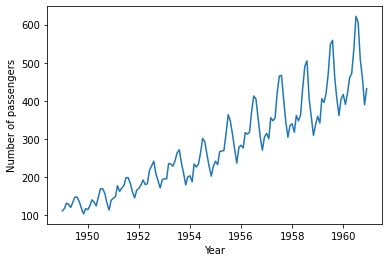

In [68]:
plt.plot(indexed_data)
plt.xlabel("Year")
plt.ylabel("Number of passengers")

In [69]:
#calculating rolling statistics
rolmean=indexed_data.rolling(window=12).mean()
rolstd=indexed_data.rolling(window=12).std()
print(rolmean,rolstd)

            Monthly Total (in 1000)
Month                              
1949-01-01                      NaN
1949-02-01                      NaN
1949-03-01                      NaN
1949-04-01                      NaN
1949-05-01                      NaN
...                             ...
1960-08-01               463.333333
1960-09-01               467.083333
1960-10-01               471.583333
1960-11-01               473.916667
1960-12-01               476.166667

[144 rows x 1 columns]             Monthly Total (in 1000)
Month                              
1949-01-01                      NaN
1949-02-01                      NaN
1949-03-01                      NaN
1949-04-01                      NaN
1949-05-01                      NaN
...                             ...
1960-08-01                83.630500
1960-09-01                84.617276
1960-10-01                82.541954
1960-11-01                79.502382
1960-12-01                77.737125

[144 rows x 1 columns]


Text(0.5, 1.0, 'Rolling mean & standard deviation')

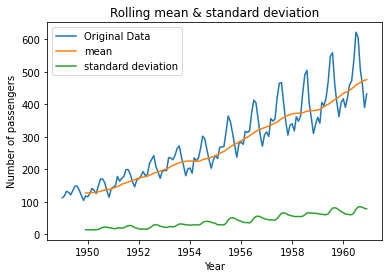

In [70]:
#plotting rolling statistics
plt.plot(indexed_data,label='Original Data')
plt.plot(rolmean,label='mean')
plt.plot(rolstd,label='standard deviation')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Number of passengers")
plt.title('Rolling mean & standard deviation')

In [71]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(indexed_data['Monthly Total (in 1000)'])
dftest

(0.815368879206047,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.6929308390189)

In [72]:
dfoutput=pd.Series(dftest)
dfoutput

0                                             0.815369
1                                              0.99188
2                                                   13
3                                                  130
4    {'1%': -3.4816817173418295, '5%': -2.884041834...
5                                              996.693
dtype: object

In [73]:
dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','P-value','Number of lags','Number of Observations'])
dfoutput

Test Statistics             0.815369
P-value                     0.991880
Number of lags             13.000000
Number of Observations    130.000000
dtype: float64

In [74]:
dftest[4]

{'1%': -3.4816817173418295,
 '10%': -2.578770059171598,
 '5%': -2.8840418343195267}

In [75]:
dftest[4].items()

dict_items([('1%', -3.4816817173418295), ('5%', -2.8840418343195267), ('10%', -2.578770059171598)])

In [76]:
for key,value in dftest[4].items():
  dfoutput["Critical Values (%s)"%key]=value
dfoutput  

Test Statistics             0.815369
P-value                     0.991880
Number of lags             13.000000
Number of Observations    130.000000
Critical Values (1%)       -3.481682
Critical Values (5%)       -2.884042
Critical Values (10%)      -2.578770
dtype: float64

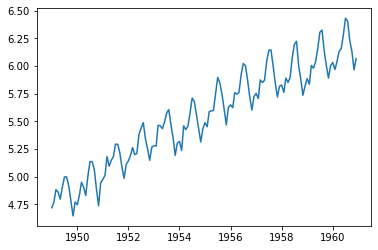

In [77]:
#Estimating Trend
index_log=np.log(indexed_data)
plt.plot(index_log)

Text(0, 0.5, 'log of Number of passengers')

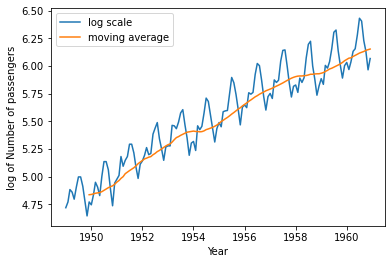

In [78]:
mov_avg=index_log.rolling(window=12).mean()
plt.plot(index_log,label='log scale')
plt.plot(mov_avg,label='moving average')
plt.legend()
plt.xlabel("Year")
plt.ylabel("log of Number of passengers")

In [79]:
log_minus_avg=index_log - mov_avg
log_minus_avg

,Monthly Total (in 1000)
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [80]:
log_minus_avg.head(12)

,Monthly Total (in 1000)
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [81]:
log_minus_avg.dropna(inplace=True)
log_minus_avg

,Monthly Total (in 1000)
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [82]:
def rolling_statistics(ts):
  rolmean=ts.rolling(window=12).mean()
  rolstd=ts.rolling(window=12).std()

  plt.plot(ts,label='Original Data')
  plt.plot(rolmean,label='mean')
  plt.plot(rolstd,label='standard deviation')
  plt.legend()
  plt.xlabel("Year")
  plt.ylabel("Number of passengers")
  plt.title('Rolling mean & standard deviation')

def dickey_fuller(ts):
   dftest=adfuller(ts['Monthly Total (in 1000)'])
   dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','P-value','Number of lags','Number of Observations'])
   for key,value in dftest[4].items():
     dfoutput["Critical Values (%s)"%key]=value
   print("Dickey Fuller Test:")
   print(dfoutput)  

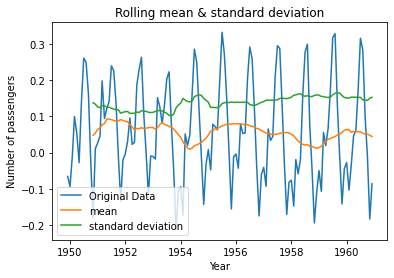

In [83]:
rolling_statistics(log_minus_avg)

In [84]:
dickey_fuller(log_minus_avg)

Dickey Fuller Test:
Test Statistics            -3.162908
P-value                     0.022235
Number of lags             13.000000
Number of Observations    119.000000
Critical Values (1%)       -3.486535
Critical Values (5%)       -2.886151
Critical Values (10%)      -2.579896
dtype: float64


Text(0, 0.5, 'log of Number of passengers')

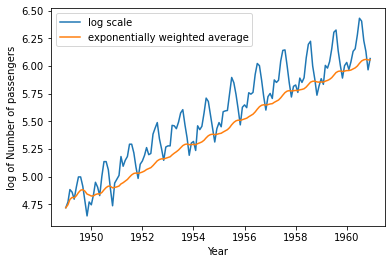

In [85]:
exp_weigh_avg=index_log.ewm(halflife=12).mean()
plt.plot(index_log,label='log scale')
plt.plot(exp_weigh_avg,label='exponentially weighted average')
plt.legend()
plt.xlabel("Year")
plt.ylabel("log of Number of passengers")

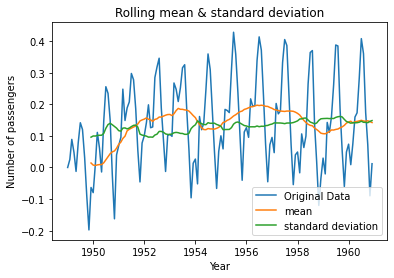

In [86]:
log_minus_exp=index_log - exp_weigh_avg
rolling_statistics(log_minus_exp)

In [87]:
dickey_fuller(log_minus_exp)

Dickey Fuller Test:
Test Statistics            -3.601262
P-value                     0.005737
Number of lags             13.000000
Number of Observations    130.000000
Critical Values (1%)       -3.481682
Critical Values (5%)       -2.884042
Critical Values (10%)      -2.578770
dtype: float64


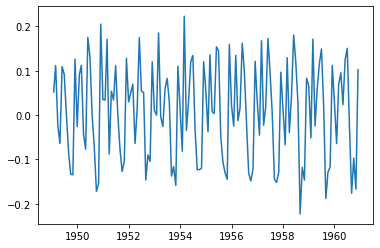

In [88]:
log_diff=index_log - index_log.shift()
plt.plot(log_diff)

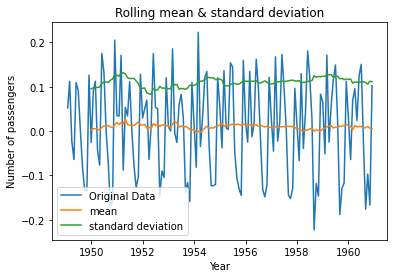

In [89]:
rolling_statistics(log_diff)

In [90]:
log_diff.dropna(inplace=True)
dickey_fuller(log_diff)

Dickey Fuller Test:
Test Statistics            -2.717131
P-value                     0.071121
Number of lags             14.000000
Number of Observations    128.000000
Critical Values (1%)       -3.482501
Critical Values (5%)       -2.884398
Critical Values (10%)      -2.578960
dtype: float64


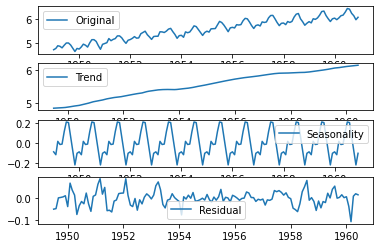

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(index_log)

trend=decompose.trend
seasonal=decompose.seasonal
residual=decompose.resid

plt.subplot(411)
plt.plot(index_log,label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend()
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend()

In [92]:
residual['Monthly Total (in 1000)'].value_counts().sum()

132

In [93]:
residual.dropna(inplace=True)

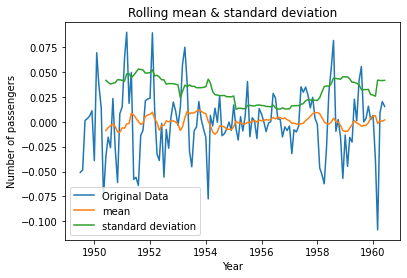

In [94]:
rolling_statistics(residual)

In [95]:
dickey_fuller(residual)

Dickey Fuller Test:
Test Statistics          -6.332387e+00
P-value                   2.885059e-08
Number of lags            9.000000e+00
Number of Observations    1.220000e+02
Critical Values (1%)     -3.485122e+00
Critical Values (5%)     -2.885538e+00
Critical Values (10%)    -2.579569e+00
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Partial Autocorrelation Function')

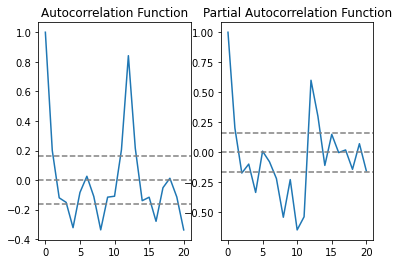

In [96]:
#ACF & PACF Plots
from statsmodels.tsa.stattools import acf,pacf
Acf=acf(log_diff,nlags=20)
Pacf=pacf(log_diff,nlags=20,method='ols')

#for acf
plt.subplot(121)
plt.plot(Acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_diff)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_diff)),linestyle='--',color='gray')
plt.title("Autocorrelation Function")

#for pacf
plt.subplot(122)
plt.plot(Pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_diff)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_diff)),linestyle='--',color='gray')
plt.title("Partial Autocorrelation Function")

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS 1.5023')

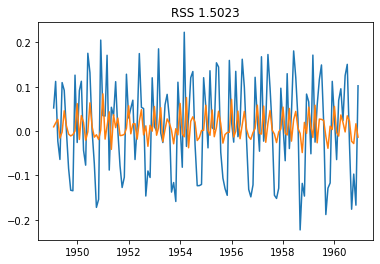

In [97]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(index_log,order=(2,1,0))
AR=model.fit()
plt.plot(log_diff)
plt.plot(AR.fittedvalues)
plt.title("RSS %.4f"% sum(( AR.fittedvalues - log_diff['Monthly Total (in 1000)'])**2 ))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS 1.4721')

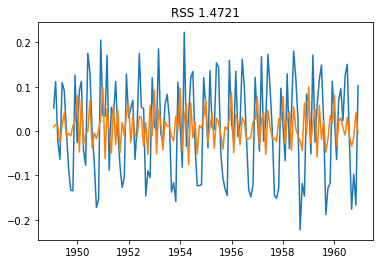

In [98]:
model=ARIMA(index_log,order=(0,1,2))
MA=model.fit()
plt.plot(log_diff)
plt.plot(MA.fittedvalues)
plt.title("RSS %.4f"% sum(( MA.fittedvalues - log_diff['Monthly Total (in 1000)'])**2 ))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS 1.0292')

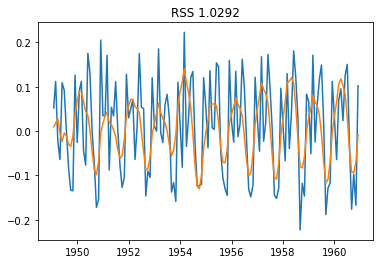

In [99]:
model=ARIMA(index_log,order=(2,1,2))
arima=model.fit()
plt.plot(log_diff)
plt.plot(arima.fittedvalues)
plt.title("RSS %.4f"% sum(( arima.fittedvalues - log_diff['Monthly Total (in 1000)'])**2 ))

In [100]:
pred_diff=arima.fittedvalues
pred_diff

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
                ...   
1960-08-01   -0.041176
1960-09-01   -0.092350
1960-10-01   -0.094013
1960-11-01   -0.069924
1960-12-01   -0.008127
Length: 143, dtype: float64

In [101]:
pred_cum=pred_diff.cumsum()
pred_cum

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
                ...   
1960-08-01    1.372553
1960-09-01    1.280203
1960-10-01    1.186190
1960-11-01    1.116266
1960-12-01    1.108139
Length: 143, dtype: float64

In [102]:
pred_log=pd.Series(index_log['Monthly Total (in 1000)'][0],index=index_log.index)
pred_log

Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
                ...   
1960-08-01    4.718499
1960-09-01    4.718499
1960-10-01    4.718499
1960-11-01    4.718499
1960-12-01    4.718499
Length: 144, dtype: float64

In [103]:
pred_log=pred_log.add(pred_cum,fill_value=0)
pred_log

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
                ...   
1960-08-01    6.091052
1960-09-01    5.998702
1960-10-01    5.904689
1960-11-01    5.834765
1960-12-01    5.826638
Length: 144, dtype: float64

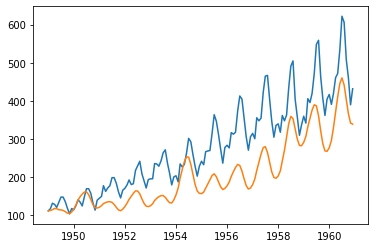

In [104]:
pred=np.exp(pred_log)
plt.plot(indexed_data)
plt.plot(pred)

In [105]:
pred

Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073415
1949-04-01    118.301990
1949-05-01    117.768366
                 ...    
1960-08-01    441.885942
1960-09-01    402.905433
1960-10-01    366.753033
1960-11-01    341.984335
1960-12-01    339.216313
Length: 144, dtype: float64

Predictions for next 2 year (i.e. 2*12=24 months)

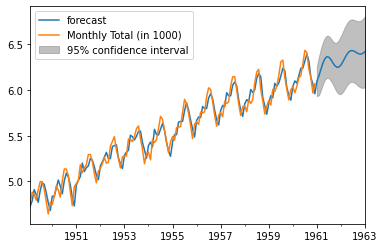

In [106]:
arima.plot_predict(1,168) #144+24=168
plt.show()

In [107]:
arima.forecast(steps=24)

(array([6.09553389, 6.15281399, 6.22442963, 6.29241102, 6.3416472 ,
        6.36359368, 6.35784693, 6.3313931 , 6.29597544, 6.26447715,
        6.24738324, 6.25025169, 6.27275833, 6.3094031 , 6.35151493,
        6.38988657, 6.41727384, 6.43011056, 6.4290669 , 6.41842488,
        6.40456152, 6.39403611, 6.39183077, 6.40019497]),
 array([0.08384711, 0.10749461, 0.11568694, 0.11702774, 0.11703496,
        0.11744017, 0.11762249, 0.11778712, 0.12024162, 0.12736043,
        0.13870961, 0.15118794, 0.16157815, 0.16834396, 0.1717733 ,
        0.17311982, 0.17358732, 0.17385459, 0.17430217, 0.17543332,
        0.17788148, 0.18195723, 0.18726219, 0.19283395]),
 array([[5.93119657, 6.25987121],
        [5.94212842, 6.36349956],
        [5.9976874 , 6.45117187],
        [6.06304087, 6.52178118],
        [6.11226291, 6.5710315 ],
        [6.13341519, 6.59377218],
        [6.12731109, 6.58838277],
        [6.10053458, 6.56225162],
        [6.06030619, 6.53164469],
        [6.0148553 , 6.514099  ],


**Other Modeling Techniques**

i) Naive Approach

ii) Moving Average

iii) Simple Exponential Smoothing

iv) Holt’s Linear Trend Model

In [109]:
len=indexed_data.shape
len

(144, 1)

In [110]:
len=indexed_data.shape[0]
train=indexed_data[:len*2//3]
test=indexed_data[len*2//3:len]

In [111]:
print(train.shape)
print(test.shape)

(96, 1)
(48, 1)


In [112]:
from math import sqrt
from sklearn.metrics import mean_squared_error

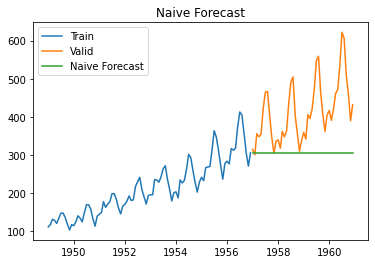

In [113]:
#naive forecast
dd= train['Monthly Total (in 1000)']
y_hat = test.copy() 
y_hat['naive'] = dd[train.shape[0]-1] 

plt.plot(train.index,train['Monthly Total (in 1000)'] , label='Train') 
plt.plot(test.index,test['Monthly Total (in 1000)'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [114]:
rms = sqrt(mean_squared_error(test['Monthly Total (in 1000)'], y_hat['naive'])) 
print(rms)

132.60993866725576


In [115]:
train['Monthly Total (in 1000)'].rolling(10).mean()

Month
1949-01-01      NaN
1949-02-01      NaN
1949-03-01      NaN
1949-04-01      NaN
1949-05-01      NaN
              ...  
1956-08-01    321.6
1956-09-01    333.4
1956-10-01    336.2
1956-11-01    334.9
1956-12-01    337.8
Name: Monthly Total (in 1000), Length: 96, dtype: float64

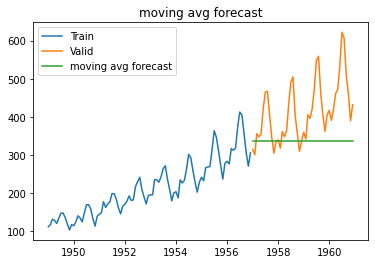

In [116]:
# moving avg
dd= train['Monthly Total (in 1000)']
y_hat = test.copy() 
y_hat['moving avg']=train['Monthly Total (in 1000)'].rolling(10).mean().iloc[-1]

plt.plot(train.index,train['Monthly Total (in 1000)'] , label='Train') 
plt.plot(test.index,test['Monthly Total (in 1000)'], label='Valid') 
plt.plot(y_hat.index,y_hat['moving avg'], label='moving avg forecast') 
plt.legend(loc='best') 
plt.title("moving avg forecast") 
plt.show()

In [117]:
rms = sqrt(mean_squared_error(test['Monthly Total (in 1000)'], y_hat['moving avg'])) 
print(rms)

108.44796371224925


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


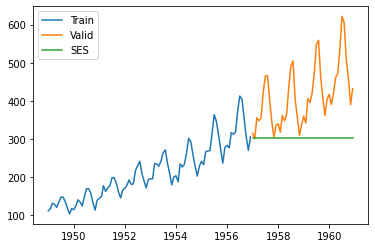

In [118]:
# simple exponential smoothing
from statsmodels.tsa.api import SimpleExpSmoothing
y_hat = test.copy() 
fit2 = SimpleExpSmoothing(train['Monthly Total (in 1000)']).fit(smoothing_level=0.6,optimized=False) 
y_hat['SES'] = fit2.forecast(test.shape[0]) 
plt.plot(train['Monthly Total (in 1000)'], label='Train') 
plt.plot(test['Monthly Total (in 1000)'], label='Valid') 
plt.plot(y_hat['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [119]:
rms = sqrt(mean_squared_error(test['Monthly Total (in 1000)'], y_hat['SES'])) 
print(rms)

136.00335113464587


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


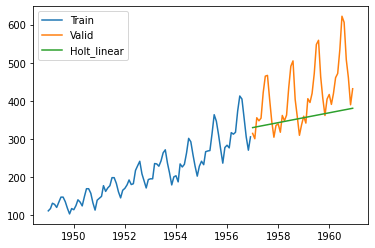

In [120]:
#Holt’s Linear Trend Model
from statsmodels.tsa.api import Holt
y_hat = test.copy() 
fit1 = Holt(train['Monthly Total (in 1000)']).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
y_hat['Holt_linear'] = fit1.forecast(test.shape[0]) 
plt.plot(train['Monthly Total (in 1000)'], label='Train') 
plt.plot(test['Monthly Total (in 1000)'], label='Valid') 
plt.plot(y_hat['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [121]:
rms = sqrt(mean_squared_error(test['Monthly Total (in 1000)'], y_hat['Holt_linear'])) 
print(rms)

91.24258566610237


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


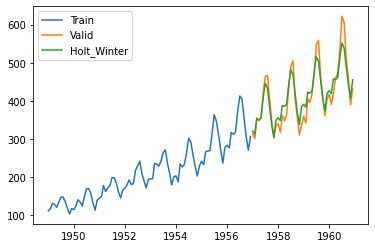

In [122]:
#Holt winter’s model
from statsmodels.tsa.api import ExponentialSmoothing
y_hat = test.copy() 
fit1 = ExponentialSmoothing(train['Monthly Total (in 1000)'] ,seasonal_periods=12 ,trend='add', seasonal='add',).fit() 
y_hat['Holt_Winter'] = fit1.forecast(test.shape[0]) 

plt.plot( train['Monthly Total (in 1000)'], label='Train') 
plt.plot(test['Monthly Total (in 1000)'], label='Valid') 
plt.plot(y_hat['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [123]:
rms = sqrt(mean_squared_error(test['Monthly Total (in 1000)'], y_hat['Holt_Winter'])) 
print(rms)

26.626698205203763


## **THE** **END**